In [1]:
#Import the required Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning 

### Data Reading & Data Types 

In [2]:
#Read the data in pandas
inp0= pd.read_csv("Attribute+DataSet.csv")
inp1= pd.read_csv("Dress+Sales.csv")

You have “Attribute DataSet” which contains a column named “Price”. Choose the correct statement from the following about its data type and variable type.
- Integer type and numerical variable
- Object type and categorical ordinal variable
- Object type and categorical nominal variable
- Float type and categorical variable.


In [3]:
inp0['Price'].unique()

array(['Low', 'High', 'Average', 'Medium', 'very-high', nan], dtype=object)

There is another column in “Attribute DataSet” named as “Recommendation”, choose the correct statement about its data type and variable type.
- Integer type and categorical
- Object type and categorical
- Integer type and continuous numerical
- Object type only.


In [4]:
inp0['Recommendation'].unique()

array([1, 0], dtype=int64)

Which of the following column do you think are of no use in “Attribute DataSet”.
- Dress_ID
- Price
- Size and material
- NeckLine
- None of the above


In [5]:
# Print the information about the attributes of inp0 and inp1.
print('Attribute Dataset Attribute info')
print(inp0.info())
print('Dress Sales Attribute info')
print(inp1.info())

Attribute Dataset Attribute info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dress_ID        479 non-null    int64  
 1   Style           479 non-null    object 
 2   Price           477 non-null    object 
 3   Rating          479 non-null    float64
 4   Size            479 non-null    object 
 5   Season          477 non-null    object 
 6   NeckLine        476 non-null    object 
 7   SleeveLength    477 non-null    object 
 8   Material        360 non-null    object 
 9   FabricType      223 non-null    object 
 10  Decoration      255 non-null    object 
 11  Pattern Type    377 non-null    object 
 12  Recommendation  479 non-null    int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 48.8+ KB
None
Dress Sales Attribute info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total

### Fixing the Rows and Columns 

As you can see, there is a column in “Attribute Dataset” named as ‘Size’. This column contains the values in abbreviation format. Write a code in Python to convert the followings:

- M into  “Medium”
- L into  “Large”
- XL into “Extra large”
- free into “Free”
- S, s & small into “Small”.

Now once you are done with changes in the dataset, what is the value of the lowest percentage, the highest percentage and the percentage of Small size categories in the column named “Size”?


In [6]:
inp0['Size'].unique()

array(['M', 'L', 'XL', 'free', 'S', 'small', 's'], dtype=object)

In [7]:
# Column fixing, correcting size abbreviation. count the percentage of each size category in "Size" column.
abbr_dict = {'M':'Medium','L':'Large','XL':'Extra large','FREE':'Free','S':'Small','SMALL':'Small'}
inp0['Size'] = inp0['Size'].apply(lambda x : abbr_dict.get(x.upper()))
inp0['Size'].unique()

array(['Medium', 'Large', 'Extra large', 'Free', 'Small'], dtype=object)

In [8]:
# Print the value counts of each category in "Size" column.
inp0['Size'].value_counts()

Medium         171
Free           165
Large           93
Small           36
Extra large     14
Name: Size, dtype: int64

In [9]:
#temp = inp0.groupby('Size')['Size'].value_counts()
temp = inp0.groupby(by=['Size']).agg({'Dress_ID':'count'}).reset_index()
temp.rename(columns={"Dress_ID": "Count"},inplace=True)
temp['Percent'] = temp['Count'].apply(lambda x : round((x*100)/len(inp0['Size']),2))
temp

,Size,Count,Percent
0,Extra large,14,2.92
1,Free,165,34.45
2,Large,93,19.42
3,Medium,171,35.70
4,Small,36,7.52


### Impute/Remove Missing values

In [10]:
# Print the null count of each variables of inp0 and inp1.
print('Attribute Dataset Null Count')
print(inp0.isnull().sum())
print()
print('Dress Sales Null Count')
print(inp1.isnull().sum())

Attribute Dataset Null Count
Dress_ID            0
Style               0
Price               2
Rating              0
Size                0
Season              2
NeckLine            3
SleeveLength        2
Material          119
FabricType        256
Decoration        224
Pattern Type      102
Recommendation      0
dtype: int64

Dress Sales Null Count
Dress_ID        0
29-08-2013      0
31-08-2013      0
09-02-2013      0
09-04-2013      0
09-06-2013      0
09-08-2013      0
09-10-2013      0
09-12-2013      0
14-09-2013      0
16-09-2013      0
18-09-2013      0
20-09-2013      0
22-09-2013      0
24-09-2013      0
26-09-2013    222
28-09-2013      0
30-09-2013    257
10-02-2013    259
10-04-2013    258
10-06-2013      0
10-08-2013    255
10-10-2013    255
10-12-2013      0
dtype: int64


You are given another dataset named “Dress Sales”. Now if you observe the datatypes of the columns using ‘inp1.info()’ command, you can identify that there are certain columns defined as object data type though they primarily consist of numeric data.

Now if you try and convert these object data type columns into numeric data type(float), you will come across an error message. Try to correct this error.







In [11]:
# Print the data types information of inp1 i.e. "Dress Sales" data.
print(inp1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    479 non-null    float64
 1   29-08-2013  479 non-null    int64  
 2   31-08-2013  479 non-null    int64  
 3   09-02-2013  479 non-null    int64  
 4   09-04-2013  479 non-null    int64  
 5   09-06-2013  479 non-null    int64  
 6   09-08-2013  479 non-null    int64  
 7   09-10-2013  479 non-null    int64  
 8   09-12-2013  479 non-null    object 
 9   14-09-2013  479 non-null    object 
 10  16-09-2013  479 non-null    object 
 11  18-09-2013  479 non-null    object 
 12  20-09-2013  479 non-null    object 
 13  22-09-2013  479 non-null    object 
 14  24-09-2013  479 non-null    int64  
 15  26-09-2013  257 non-null    float64
 16  28-09-2013  479 non-null    int64  
 17  30-09-2013  222 non-null    float64
 18  10-02-2013  220 non-null    float64
 19  10-04-2013  221 non-null    f

In [12]:
# Try to convert the object type into float type of data. YOU GET ERROR MESSAGE.
inp1['09-12-2013'].astype(float)

ValueError: could not convert string to float: 'Removed'

In [13]:
inp1.loc[isinstance(inp1['09-12-2013'],float)]

KeyError: False

In [14]:
# Do the required changes in the "Dress Sales" data set to get null values on string values.
'''
inp1.loc[inp1['09-12-2013']== 'Removed',"09-12-2013"] = np.NaN
inp1.loc[inp1['14-09-2013']== 'removed',"14-09-2013"] = np.NaN
inp1.loc[inp1['16-09-2013']== 'removed',"16-09-2013"] = np.NaN
inp1.loc[inp1['18-09-2013']== 'removed',"18-09-2013"] = np.NaN
inp1.loc[inp1['20-09-2013']== 'removed',"20-09-2013"] = np.NaN
inp1.loc[inp1['22-09-2013']== 'Orders',"22-09-2013"] = np.NaN
'''
'''
for i in inp1.columns:
    if inp1[i].dtype == object :
        print(inp1[inp1[i]])
'''

'\nfor i in inp1.columns:\n    if inp1[i].dtype == object :\n        print(inp1[inp1[i]])\n'

In [15]:
# Convert the object type columns in "Dress Sales" into float type of data type.
#inp1['09-12-2013'] = pd.to_numeric(inp1['09-12-2013'], errors='coerce')
#inp1['14-09-2013'] = pd.to_numeric(inp1['14-09-2013'], errors='coerce')
#inp1['16-09-2013'] = pd.to_numeric(inp1['16-09-2013'], errors='coerce')
#inp1['18-09-2013'] = pd.to_numeric(inp1['18-09-2013'], errors='coerce')
#inp1['20-09-2013'] = pd.to_numeric(inp1['20-09-2013'], errors='coerce')
#inp1['22-09-2013'] = pd.to_numeric(inp1['22-09-2013'], errors='coerce')
for i in inp1.columns:
    if inp1[i].dtype == object:
        inp1[i] = pd.to_numeric(inp1[i], errors='coerce')
        
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    479 non-null    float64
 1   29-08-2013  479 non-null    int64  
 2   31-08-2013  479 non-null    int64  
 3   09-02-2013  479 non-null    int64  
 4   09-04-2013  479 non-null    int64  
 5   09-06-2013  479 non-null    int64  
 6   09-08-2013  479 non-null    int64  
 7   09-10-2013  479 non-null    int64  
 8   09-12-2013  478 non-null    float64
 9   14-09-2013  478 non-null    float64
 10  16-09-2013  478 non-null    float64
 11  18-09-2013  478 non-null    float64
 12  20-09-2013  478 non-null    float64
 13  22-09-2013  478 non-null    float64
 14  24-09-2013  479 non-null    int64  
 15  26-09-2013  257 non-null    float64
 16  28-09-2013  479 non-null    int64  
 17  30-09-2013  222 non-null    float64
 18  10-02-2013  220 non-null    float64
 19  10-04-2013  221 non-null    f

When you see the null counts in “Dress Sales” dataset after performing all the operations that have been mentioned in jupyter notebook, you will find that there are some columns in “Dress Sales” data where there are more than 40% of missing values. Based on your understanding of dealing with missing values do the following steps.

In [16]:
# Print the null percetange of each column of inp1.
missing_sum = inp1.isnull().sum()
percent_missing = inp1.isnull().sum() * 100 / len(inp1)
temp_dress = pd.DataFrame({'column_name': inp1.columns,'count_of_missing': missing_sum,'percent_of_missing': percent_missing})
temp_dress

,column_name,count_of_missing,percent_of_missing
Dress_ID,Dress_ID,0,0.000000
29-08-2013,29-08-2013,0,0.000000
31-08-2013,31-08-2013,0,0.000000
09-02-2013,09-02-2013,0,0.000000
09-04-2013,09-04-2013,0,0.000000
09-06-2013,09-06-2013,0,0.000000
09-08-2013,09-08-2013,0,0.000000
09-10-2013,09-10-2013,0,0.000000
09-12-2013,09-12-2013,1,0.208768
14-09-2013,14-09-2013,1,0.208768


In [17]:
# Drop the columns in "Dress Sales" which have more than 40% of missing values.
#temp_dress[temp_dress['percent_of_missing'] > 40].index
inp1.drop(columns=temp_dress[temp_dress['percent_of_missing'] > 40].index , axis=1 , inplace=True)
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    479 non-null    float64
 1   29-08-2013  479 non-null    int64  
 2   31-08-2013  479 non-null    int64  
 3   09-02-2013  479 non-null    int64  
 4   09-04-2013  479 non-null    int64  
 5   09-06-2013  479 non-null    int64  
 6   09-08-2013  479 non-null    int64  
 7   09-10-2013  479 non-null    int64  
 8   09-12-2013  478 non-null    float64
 9   14-09-2013  478 non-null    float64
 10  16-09-2013  478 non-null    float64
 11  18-09-2013  478 non-null    float64
 12  20-09-2013  478 non-null    float64
 13  22-09-2013  478 non-null    float64
 14  24-09-2013  479 non-null    int64  
 15  28-09-2013  479 non-null    int64  
 16  10-06-2013  479 non-null    int64  
 17  10-12-2013  479 non-null    int64  
dtypes: float64(7), int64(11)
memory usage: 67.5 KB


You should categorise the dates into seasons in “Dress Sales” data to simplify the analysis according to the following criteria:
- June, July and August: Summer.
- September, October and November: Autumn.
- December, January and February: WInter.
- March, April and May: Spring.




In [18]:
sum_col_list = [] 
aut_col_list = []
win_col_list = []
sp_col_list = []
for i in inp1.columns:
    if i !=  'Dress_ID': 
        extract_month = pd.to_datetime(i,dayfirst=True).month
        print(i,"=",extract_month)
        if(extract_month>= 6 and extract_month <= 8): 
            sum_col_list.append(i)
        elif(extract_month >= 9 and extract_month <= 11): 
            aut_col_list.append(i)
        elif(extract_month >= 12 or extract_month <= 2): 
            win_col_list.append(i)
        elif(extract_month >= 3 and extract_month <= 5): 
            sp_col_list.append(i)

print(sum_col_list, aut_col_list, win_col_list, sp_col_list)

29-08-2013 = 8
31-08-2013 = 8
09-02-2013 = 2
09-04-2013 = 4
09-06-2013 = 6
09-08-2013 = 8
09-10-2013 = 10
09-12-2013 = 12
14-09-2013 = 9
16-09-2013 = 9
18-09-2013 = 9
20-09-2013 = 9
22-09-2013 = 9
24-09-2013 = 9
28-09-2013 = 9
10-06-2013 = 6
10-12-2013 = 12
['29-08-2013', '31-08-2013', '09-06-2013', '09-08-2013', '10-06-2013'] ['09-10-2013', '14-09-2013', '16-09-2013', '18-09-2013', '20-09-2013', '22-09-2013', '24-09-2013', '28-09-2013'] ['09-02-2013', '09-12-2013', '10-12-2013'] ['09-04-2013']


In [19]:
# Create the four seasons columns in inp1, according to the above criteria.

inp1['Summer'] = np.zeros(len(inp1))
inp1['Autumn'] = np.zeros(len(inp1))
inp1['Winter'] = np.zeros(len(inp1))
inp1['Spring'] = np.zeros(len(inp1))

inp1.head()

,Dress_ID,29-08-2013,31-08-2013,09-02-2013,09-04-2013,09-06-2013,09-08-2013,09-10-2013,09-12-2013,14-09-2013,...,20-09-2013,22-09-2013,24-09-2013,28-09-2013,10-06-2013,10-12-2013,Summer,Autumn,Winter,Spring
0,1.006033e+09,2114,2274,2491,2660,2727,2887,2930,3119.0,3204.0,...,3386.0,3479.0,3554,3706,3897,4048,0.0,0.0,0.0,0.0
1,1.212192e+09,151,275,570,750,813,1066,1164,1558.0,1756.0,...,2106.0,2454.0,2710,3258,3911,4277,0.0,0.0,0.0,0.0
2,1.190381e+09,6,7,7,7,8,8,9,10.0,10.0,...,10.0,11.0,11,11,11,11,0.0,0.0,0.0,0.0
3,9.660060e+08,1005,1128,1326,1455,1507,1621,1637,1723.0,1746.0,...,1812.0,1845.0,1878,1914,1952,1963,0.0,0.0,0.0,0.0
4,8.763395e+08,996,1175,1304,1396,1432,1559,1570,1638.0,1655.0,...,1824.0,1919.0,2032,2252,2544,2736,0.0,0.0,0.0,0.0


In [20]:
# calculate the sum of sales in each seasons in inp1 i.e. "Dress Sales".

for i in sum_col_list:
    inp1['Summer'] = inp1['Summer'] + inp1[i]
    
for i in aut_col_list:
    inp1['Autumn'] = inp1['Autumn'] + inp1[i]
    
for i in win_col_list:
    inp1['Winter'] = inp1['Winter'] + inp1[i]

for i in sp_col_list:
    inp1['Spring'] = inp1['Spring'] + inp1[i]
    

inp1.head()

,Dress_ID,29-08-2013,31-08-2013,09-02-2013,09-04-2013,09-06-2013,09-08-2013,09-10-2013,09-12-2013,14-09-2013,...,20-09-2013,22-09-2013,24-09-2013,28-09-2013,10-06-2013,10-12-2013,Summer,Autumn,Winter,Spring
0,1.006033e+09,2114,2274,2491,2660,2727,2887,2930,3119.0,3204.0,...,3386.0,3479.0,3554,3706,3897,4048,13899.0,26857.0,9658.0,2660.0
1,1.212192e+09,151,275,570,750,813,1066,1164,1558.0,1756.0,...,2106.0,2454.0,2710,3258,3911,4277,6216.0,17311.0,6405.0,750.0
2,1.190381e+09,6,7,7,7,8,8,9,10.0,10.0,...,10.0,11.0,11,11,11,11,40.0,82.0,28.0,7.0
3,9.660060e+08,1005,1128,1326,1455,1507,1621,1637,1723.0,1746.0,...,1812.0,1845.0,1878,1914,1952,1963,7213.0,14411.0,5012.0,1455.0
4,8.763395e+08,996,1175,1304,1396,1432,1559,1570,1638.0,1655.0,...,1824.0,1919.0,2032,2252,2544,2736,7706.0,14676.0,5678.0,1396.0


In [21]:
pd.set_option('display.float_format', '{:.2f}'.format)
inp1.sum()

Dress_ID     432173899433.00
29-08-2013          94883.00
31-08-2013         100483.00
09-02-2013         107081.00
09-04-2013         143600.00
09-06-2013         145973.00
09-08-2013         151620.00
09-10-2013         153328.00
09-12-2013         159693.00
14-09-2013         162792.00
16-09-2013         165318.00
18-09-2013         167833.00
20-09-2013         172351.00
22-09-2013         176414.00
24-09-2013         178638.00
28-09-2013         186614.00
10-06-2013         198948.00
10-12-2013         207909.00
Summer             691907.00
Autumn            1353543.00
Winter             473640.00
Spring             143600.00
dtype: float64

Now let's merge inp1 with inp0 with left join manner, so that the information of inp0 should remain intact.

In [22]:
# Merge inp0 with inp1 into inp0. this is also called left merge.
inp0 = pd.merge(left=inp0,right=inp1, how='left', left_on='Dress_ID', right_on='Dress_ID')
inp0.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,...,20-09-2013,22-09-2013,24-09-2013,28-09-2013,10-06-2013,10-12-2013,Summer,Autumn,Winter,Spring
0,1006032852,Sexy,Low,4.60,Medium,Summer,o-neck,sleevless,NaN,chiffon,...,3386.00,3479.00,3554,3706,3897,4048,13899.00,26857.00,9658.00,2660.00
1,1212192089,Casual,Low,0.00,Large,Summer,o-neck,Petal,microfiber,NaN,...,2106.00,2454.00,2710,3258,3911,4277,6216.00,17311.00,6405.00,750.00
2,1190380701,vintage,High,0.00,Large,Automn,o-neck,full,polyster,NaN,...,10.00,11.00,11,11,11,11,40.00,82.00,28.00,7.00
3,966005983,Brief,Average,4.60,Large,Spring,o-neck,full,silk,chiffon,...,1812.00,1845.00,1878,1914,1952,1963,7213.00,14411.00,5012.00,1455.00
4,876339541,cute,Low,4.50,Medium,Summer,o-neck,butterfly,chiffonfabric,chiffon,...,1824.00,1919.00,2032,2252,2544,2736,7706.00,14676.00,5678.00,1396.00


In [23]:
# Now Drop the Date columns from inp0 as it is already combined into four seasons.
inp0.drop(inp0.loc[:,'29-08-2013':'10-12-2013'].columns, axis= 1, inplace= True)

Print the null count of inp0 to get the idea about the missing values in data set.

In [24]:
# Print the null count of each columns in inp0 dataframe i.e. combined data frame of inp0 and inp1 without date columns.
missing_sum = inp0.isnull().sum()
percent_missing = inp0.isnull().sum() * 100 / len(inp0)
temp_count = pd.DataFrame({'column_name': inp0.columns,'count_of_missing': missing_sum,'percent_of_missing': percent_missing})
temp_count

,column_name,count_of_missing,percent_of_missing
Dress_ID,Dress_ID,0,0.00
Style,Style,0,0.00
Price,Price,2,0.42
Rating,Rating,0,0.00
Size,Size,0,0.00
Season,Season,2,0.42
NeckLine,NeckLine,3,0.63
SleeveLength,SleeveLength,2,0.42
Material,Material,119,24.84
FabricType,FabricType,256,53.44


You can see that there are two types of variables one with a large number of missing values and another is very less number of missing values. These two columns can be categorized as:

Type-1: Missing values are very less (around 2 or 3 missing values): Price, Season, NeckLine, SleeveLength, Winter and Autumn. 

Type-2: Missing values are large in numbers (more than 15%): Material, FabricType, Decoration and Pattern Type.



In [25]:
# Deal with the missing values of Type-1 columns: Price, Season, NeckLine, SleeveLength, Winter and Autumn.
type1 = ['Price', 'Season', 'NeckLine', 'SleeveLength', 'Winter', 'Autumn']
for i in type1:
    inp0 = inp0[~inp0[i].isnull()]

missing_sum = inp0.isnull().sum()
percent_missing = inp0.isnull().sum() * 100 / len(inp0)
temp_count = pd.DataFrame({'column_name': inp0.columns,'count_of_missing': missing_sum,'percent_of_missing': percent_missing})
temp_count

,column_name,count_of_missing,percent_of_missing
Dress_ID,Dress_ID,0,0.00
Style,Style,0,0.00
Price,Price,0,0.00
Rating,Rating,0,0.00
Size,Size,0,0.00
Season,Season,0,0.00
NeckLine,NeckLine,0,0.00
SleeveLength,SleeveLength,0,0.00
Material,Material,116,24.63
FabricType,FabricType,250,53.08


In [26]:
# Deal with the missing values for Type-2 columns: Material, FabricType, Decoration and Pattern Type.
type2 = ['Material', 'FabricType', 'Decoration', 'Pattern Type']

for i in type2:
    inp0[i]= inp0[i].replace(np.nan, "Missing")


inp0.isnull().sum() * 100 / len(inp0)

Dress_ID         0.00
Style            0.00
Price            0.00
Rating           0.00
Size             0.00
Season           0.00
NeckLine         0.00
SleeveLength     0.00
Material         0.00
FabricType       0.00
Decoration       0.00
Pattern Type     0.00
Recommendation   0.00
Summer           0.00
Autumn           0.00
Winter           0.00
Spring           0.00
dtype: float64

### Standardise value 

In the given dataset, there are certain discrepancies with the categorical names such as irregular spellings. Choose the correct option of columns with irregular categories and update them.
 
- Season, NeckLine
- Price, Material
- fabricType, Decoration
- Season, SleeveLength


In [27]:
#correcting the spellings.
inp0.Price.value_counts()

Average      237
Low          162
Medium        30
very-high     21
High          21
Name: Price, dtype: int64

In [28]:
#correcting the Spellings.
spell_checker = {'Automn':'Autumn','spring':'Spring','winter':'Winter','very-high':'Very-High',
                 'sleevless':'sleeveless', 'sleeevless':'sleeveless','sleveless':'sleeveless', 'half':'halfsleeve',
                 'capsleeves':'cap-sleeves','urndowncollor':'turndowncollor', 
                 'thressqatar':'threequarter','threequater':'threequarter'}

inp0['Season'] = inp0['Season'].apply(lambda x : spell_checker.get(x,x))
inp0['SleeveLength'] = inp0['SleeveLength'].apply(lambda x : spell_checker.get(x,x))
inp0['Price'] = inp0['Price'].apply(lambda x : spell_checker.get(x,x))

## Univariate Analysis 

### Categorical Unordered Univariate Analysis
 

There is a column named ‘Style’ in ‘Attribute Dataset’ which consists of the different style categories of the women apparels. Certain categories whose total sale is less than 50000 across all the seasons is considered under one single category as ‘Others’.


Which of the following categories in ‘Style’ column can be grouped into ‘Others’ category? and perform the grouping operation in the notebook for further analysis.
- Flare, fashion
- Novelty, bohemian
- OL, fashion, work
- Novelty, fashion, Flare


In [29]:
# Group "Style" categories into "Others" which have less than 50000 sales across all the seasons.
style_cat = inp0.groupby(by=['Style'])['Summer','Autumn','Winter','Spring'].sum()
style_cat['Total_Sales'] = style_cat.sum(axis=1)
style_cat[style_cat['Total_Sales'] < 50000]
inp0.replace(style_cat[style_cat['Total_Sales'] < 50000].index, 'Others', inplace=True)
inp0['Style'].value_counts()

# below solution can also be used.
#style_cat[style_cat.sum(axis= 1)<50000]
#inp0.replace(style_cat[style_cat.sum(axis=1)<50000].index, 'Others', inplace=True)

D:\Abhishek\Py\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Casual      217
Sexy         65
party        48
cute         43
vintage      25
bohemian     23
work         17
Brief        17
Others       10
sexy          6
Name: Style, dtype: int64

What is the percentage of “cute” and “Others” category in “Style” column in “Attribute DataSet” respectively?
- 46%, 5%
- 9%, 2.1%
- 2.1%, 5%
- 13.8%, 9%

In [30]:
# Calculate the percentage of each categories in the "Style" variable.
inp0['Style'].value_counts(normalize=True)

Casual     0.46
Sexy       0.14
party      0.10
cute       0.09
vintage    0.05
bohemian   0.05
work       0.04
Brief      0.04
Others     0.02
sexy       0.01
Name: Style, dtype: float64

Similarly Club Neckline, SLeeve length categories into "Others" which have less than 50000 sales across all the seasons.

In [31]:
inp0['NeckLine'].value_counts()

o-neck             255
v-neck             117
slash-neck          25
boat-neck           18
turndowncollor      13
Sweetheart          13
bowneck             10
peterpan-collor      5
sqare-collor         5
open                 3
Scoop                2
backless             1
halter               1
ruffled              1
sweetheart           1
mandarin-collor      1
Name: NeckLine, dtype: int64

In [32]:
# Group "Neckline" categories into "Others" which have less than 50000 sales across all the seasons.
neckline_cat = inp0.groupby(by=['NeckLine'])['Summer','Autumn','Winter','Spring'].sum()
neckline_cat['Total_Sales'] = neckline_cat.sum(axis=1)
neckline_cat[neckline_cat['Total_Sales'] < 50000]
inp0.replace(neckline_cat[neckline_cat['Total_Sales'] < 50000].index, 'Others', inplace=True)
inp0['NeckLine'].value_counts()

D:\Abhishek\Py\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


o-neck            255
v-neck            117
Others             42
slash-neck         25
boat-neck          18
turndowncollor     13
ruffled             1
Name: NeckLine, dtype: int64

In [33]:
inp0['SleeveLength'].value_counts()

sleeveless        220
short              92
full               91
halfsleeve         33
threequarter       26
cap-sleeves         5
turndowncollor      2
Petal               1
butterfly           1
Name: SleeveLength, dtype: int64

In [34]:
# Group "Sleeve length" categories into "Others" which have less than 50000 sales across all the seasons.
sleeve_cat = inp0.groupby(by=['SleeveLength'])['Summer','Autumn','Winter','Spring'].sum()
sleeve_cat['Total_Sales'] = sleeve_cat.sum(axis=1)
sleeve_cat[sleeve_cat['Total_Sales'] < 50000]
inp0.replace(sleeve_cat[sleeve_cat['Total_Sales'] < 50000].index, 'Others', inplace=True)
inp0['SleeveLength'].value_counts()

D:\Abhishek\Py\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


sleeveless      220
short            92
full             91
halfsleeve       33
threequarter     26
Others            9
Name: SleeveLength, dtype: int64

Club material, fabrictype, patterntype and decoration categories into "Others" which have less than 25000 sales across all the seasons

In [35]:
inp0['Material'].value_counts()

cotton           144
Missing          116
polyster          92
silk              26
chiffonfabric     24
mix               12
rayon             10
nylon             10
milksilk           5
spandex            5
cashmere           4
acrylic            3
microfiber         3
linen              3
lycra              3
shiffon            2
other              2
viscos             2
sill               1
modal              1
model              1
wool               1
lace               1
Name: Material, dtype: int64

In [36]:
# Group "material" categories into "Others" which have less than 25000 sales across all the seasons.
material_cat = inp0.groupby(by=['Material'])['Summer','Autumn','Winter','Spring'].sum()
material_cat['Total_Sales'] = material_cat.sum(axis=1)
material_cat[material_cat['Total_Sales'] < 25000]
inp0.replace(material_cat[material_cat['Total_Sales'] < 25000].index, 'Others', inplace=True)
inp0['Material'].value_counts()

D:\Abhishek\Py\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


cotton           144
Missing          116
polyster          92
Others            29
silk              26
chiffonfabric     24
mix               12
rayon             10
nylon             10
milksilk           5
microfiber         3
Name: Material, dtype: int64

In [37]:
inp0['FabricType'].value_counts()

Missing       250
chiffon       128
broadcloth     29
worsted        18
jersey         12
Others         10
sattin          6
wollen          2
Corduroy        2
poplin          2
tulle           2
batik           2
flannel         1
knitted         1
dobby           1
terry           1
satin           1
organza         1
knitting        1
flannael        1
Name: FabricType, dtype: int64

In [38]:
# Group "fabric type" categories into "Others" which have less than 25000 sales across all the seasons.
fabric_cat = inp0.groupby(by=['FabricType'])['Summer','Autumn','Winter','Spring'].sum()
fabric_cat['Total_Sales'] = fabric_cat.sum(axis=1)
fabric_cat[fabric_cat['Total_Sales'] < 25000]
inp0.replace(fabric_cat[fabric_cat['Total_Sales'] < 25000].index, 'Others', inplace=True)
inp0['FabricType'].value_counts()

D:\Abhishek\Py\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Missing       250
chiffon       128
Others         34
broadcloth     29
worsted        18
jersey         12
Name: FabricType, dtype: int64

In [39]:
inp0['Pattern Type'].value_counts()

solid        196
Missing       98
print         67
patchwork     46
animal        19
striped       15
dot           13
geometric      5
plaid          3
leopard        3
floral         2
splice         1
character      1
none           1
leapord        1
Name: Pattern Type, dtype: int64

In [40]:
# Group "patern type" categories into "Others" which have less than 25000 sales across all the seasons.
pattern_cat = inp0.groupby(by=['Pattern Type'])['Summer','Autumn','Winter','Spring'].sum()
pattern_cat['Total_Sales'] = pattern_cat.sum(axis=1)
pattern_cat[pattern_cat['Total_Sales'] < 25000]
inp0.replace(pattern_cat[pattern_cat['Total_Sales'] < 25000].index, 'Others', inplace=True)
inp0['Pattern Type'].value_counts()

D:\Abhishek\Py\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


solid        196
Missing       98
print         67
patchwork     46
animal        19
striped       15
dot           13
Others         9
geometric      5
leopard        3
Name: Pattern Type, dtype: int64

In [41]:
inp0['Decoration'].value_counts()

Missing       220
Others         67
sashes         41
hollowout      21
beading        21
applique       20
ruffles        17
bow            14
sequined       13
pockets         5
button          5
embroidary      4
flowers         4
crystal         3
ruched          3
rivet           3
feathers        2
plain           2
draped          2
pearls          1
Tiered          1
cascading       1
tassel          1
Name: Decoration, dtype: int64

In [42]:
# Group "decoration" categories into "Others" which have less than 25000 sales across all the seasons.
derco_cat = inp0.groupby(by=['Decoration'])['Summer','Autumn','Winter','Spring'].sum()
derco_cat['Total_Sales'] = derco_cat.sum(axis=1)
derco_cat[derco_cat['Total_Sales'] < 25000]
inp0.replace(derco_cat[derco_cat['Total_Sales'] < 25000].index, 'Others', inplace=True)
inp0['Decoration'].value_counts()

D:\Abhishek\Py\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Missing       220
Others        100
sashes         41
hollowout      21
beading        21
applique       20
ruffles        17
bow            14
sequined       13
embroidary      4
Name: Decoration, dtype: int64

### Caregorical Ordered Univariate Analysis

Which of the following is an unordered variable in “Attribute DataSet”.
- Style
- Price
- Season
- Size


### Numerical variable Univariate analysis:

What is the approximate difference between the maximum value and 75th percentile in “Autumn” column.
- Approx 54000
- Approx 55000
- Approx 52000
- Approx 50000



In [43]:
# Describe the numerical variale: "Autumn".
print(inp0['Autumn'].describe())
print('Values-',inp0.Autumn.quantile([0.99, 1]))
print('Max - 75th Percentile :', inp0['Autumn'].max() - np.percentile(inp0['Autumn'],75))


count     471.00
mean     2852.85
std      5037.03
min         1.00
25%       410.50
50%      1334.00
75%      3126.00
max     55532.00
Name: Autumn, dtype: float64
Values- 0.99   24134.00
1.00   55532.00
Name: Autumn, dtype: float64
Max - 75th Percentile : 52406.0


<AxesSubplot:>

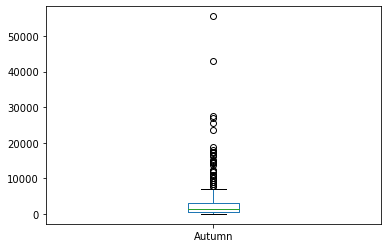

In [44]:
# plot the boxplot of "Autumn" column.
inp0['Autumn'].plot.box()

Which of the following season has the highest difference between the maximum value and 99th quantile of sales?
- Winter
- Summer
- Spring
- Autumn


In [45]:
# Find the maximum and 99th percentile of Winter season.
print('Max - 99th Percentile :', inp0['Winter'].max() - np.percentile(inp0['Winter'],99))

Max - 99th Percentile : 11402.69999999999


In [46]:
# Find the maximum and 99th percentile of Summer season.
print('Max - 99th Percentile :', inp0['Summer'].max() - np.percentile(inp0['Summer'],99))

Max - 99th Percentile : 21602.999999999996


In [47]:
# Find the maximum and 99th percentile of Spring season.
print('Max - 99th Percentile :', inp0['Spring'].max() - np.percentile(inp0['Spring'],99))

Max - 99th Percentile : 4716.8


In [48]:
# Find the maximum and 99th percentile of Autumn season.
print('Max - 99th Percentile :', inp0['Autumn'].max() - np.percentile(inp0['Autumn'],99))

Max - 99th Percentile : 31397.999999999975


## Bivariate Analysis 

### Numerical- Categorical analysis

Which of the following “Price” category has the lowest average value of rating?
- very-high
- Medium
- Low
- High


In [49]:
# Find the Mean of Ratings for each Price category.
inp0.groupby(by=['Price'])['Rating'].aggregate(['mean'])

,mean
Price,
Average,3.45
High,2.91
Low,3.73
Medium,3.16
Very-High,3.12


What is the median of the rating of “vintage” category in Style column?
- 4.6
- 4.7
- 4.55
- 0.00


In [50]:
# Find the median of Ratings for each Style category.
inp0.groupby(by=['Style'])['Rating'].aggregate(['median'])

,median
Style,
Brief,4.60
Casual,4.60
Others,0.00
Sexy,4.60
bohemian,4.60
cute,4.60
party,4.70
sexy,4.55
vintage,4.60


Which of the following season has the highest average value of sale for “Recommendation” value equals to 1.
- Summer
- Spring
- Autumn
- Winter


In [51]:
inp0['Recommendation'].unique()

array([1, 0], dtype=int64)

In [52]:
# Summer sale vs Recommendation.
inp0.groupby(by=['Recommendation'])['Summer'].aggregate(['mean'])

,mean
Recommendation,
0,1433.55
1,1469.90


In [53]:
# Spring sale vs Recommendation.
inp0.groupby(by=['Recommendation'])['Spring'].aggregate(['mean'])

,mean
Recommendation,
0,298.21
1,303.66


In [54]:
# Autumn sale vs Recommendation.
inp0.groupby(by=['Recommendation'])['Autumn'].aggregate(['mean'])

,mean
Recommendation,
0,2841.72
1,2868.06


In [55]:
# Winter sale vs Recommendation.
inp0.groupby(by=['Recommendation'])['Winter'].aggregate(['mean'])

,mean
Recommendation,
0,987.65
1,1002.81


D:\Abhishek\Py\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


'\nsns.boxplot(data=inp0, x="Recommendation",y="Autumn")\nplt.show()\n'

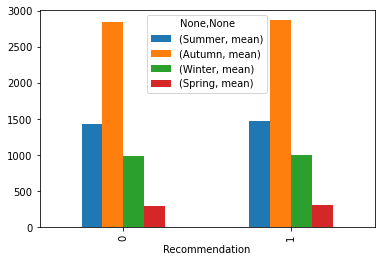

In [66]:
inp0.groupby(by=['Recommendation'])['Summer','Autumn','Winter','Spring'].aggregate(['mean']).plot.bar()
'''
sns.boxplot(data=inp0, x="Recommendation",y="Autumn")
plt.show()
'''

### Categorical categorical bivariate analysis


Which of the following size categories has the highest positive recommendations?
- Medium and extra large
- Extra large and small
- Free and small
- Free and medium


<AxesSubplot:xlabel='Size'>

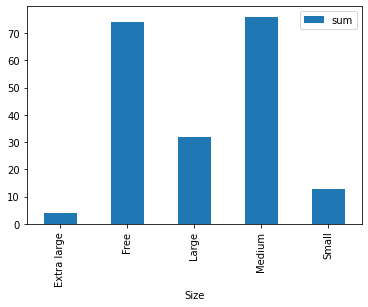

In [57]:
# Size vs Recommendation.
inp0.groupby(by=['Size',])['Recommendation'].aggregate(['sum']).plot.bar()

In [58]:
inp0[inp0['Recommendation'] == 1].groupby(by=['Size',])['Recommendation'].aggregate(['sum'])

,sum
Size,
Extra large,4
Free,74
Large,32
Medium,76
Small,13


### Multivariate analysis 

Which of the following pair of “Style” and “Price” category has the highest average of positive recommendations?
- Price: medium and style: vintage
- Price: medium and style: cute
- Price: very high and style: party
- Price: low and style: sexy


<AxesSubplot:xlabel='Price', ylabel='Style'>

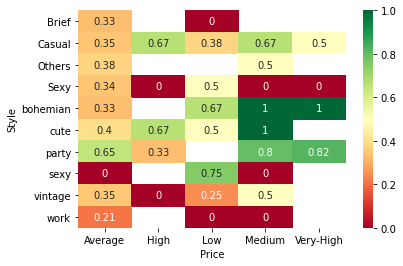

In [59]:
# plot the heat map of Style, price and Recommendation.
sns.heatmap(pd.pivot_table(data=inp0,index="Style",columns="Price",values="Recommendation"),annot=True,cmap='RdYlGn')
'''
res = pd.pivot_table(data=inp0, index="Style", columns="Price", values="Recommendation")
sns.heatmap(res, cmap="RdYlGn", annot=True, center=0.427)
plt.show()
'''

Which of the following material type has no recommendation in summer and winter seasons?
- Mix and Milksilk
- Nylon and Rayon
- Microfiber and Silk
- Milksilk and Microfiber


<AxesSubplot:xlabel='Material', ylabel='Season'>

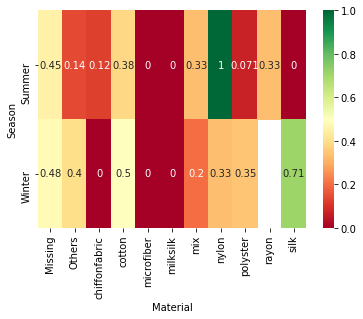

In [64]:
# plot the heat map of Season, material and Recommendation.
sns.heatmap(pd.pivot_table(data=inp0[(inp0['Season'] == 'Summer') | (inp0['Season']  == 'Winter')],index="Season",columns="Material",values="Recommendation"),annot=True,cmap='RdYlGn')
'''
res = pd.pivot_table(data=inp0, index="Material", columns="Season", values="Recommendation")
sns.heatmap(res, cmap="RdYlGn", annot=True, center=0.427)
plt.show()
'''